In [3]:
import pandas as pd

In [4]:
# read csv file
filename = "Project_1_dataset_01_01_2022.csv"
df = pd.read_csv(filename)

In [5]:
# check the data
df.head()

,Unnamed: 0,full_text,summary,keywords,publish_date,authors,url,leaf_label,root_label
0,590,Having made a massive impact in Saudi Arabia w...,Having made a massive impact in Saudi Arabia w...,"['singhs', 'rooting', 'cool', 'saudi', 'style'...",NaN,[],https://www.msn.com/en-in/entertainment/other/...,cricket,sports
1,388,Cricket is all about the emotional rollercoast...,"No matter which team fans hope to win, every s...","['wants', 'fans', 'finals', 'cup', 'win', 'tou...",NaN,[],https://www.prnewswire.com:443/news-releases/c...,cricket,sports
2,423,New Zealand announces back-to-back tours next ...,New Zealand announces back-to-back tours next ...,"['test', 'west', 'tour', 'zealand', 'world', '...",2021-12-20 00:00:00,[],https://www.aljazeera.com/news/2021/12/20/cric...,cricket,sports
3,563,It's not the first time cricket fans in the co...,Billed as one of the pre-tournament favourites...,"['qualify', 'afghanistan', 'cup', 'world', 'ze...",NaN,[],https://www.msn.com/en-in/news/other/t20-world...,cricket,sports
4,634,An employee works on a computer terminal again...,"REUTERS/Sivaram VBENGALURU, Oct 11 (Reuters Br...","['success', 'tech', 'startup', 'talent', 'onli...",2021-10-11 00:00:00,['Una Galani'],https://www.reuters.com/breakingviews/india-in...,cricket,sports


## Question1

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
class question1:
    def __init__(self):
        pass
    def overview(self,df):
        shape = df.shape
        samples,features = shape[0],shape[1]
        return samples,features
    
    def histogram_a(self,df):
        r,c = self.overview(df)
        ft = df['full_text']
        
        count = []
        for i in range(r):
            count.append(len(ft[i]))
        
        plt.figure()
        plt.hist(count,50)
        plt.xlabel('count')
        plt.ylabel('frequency')
        plt.show()
        
    def histogram_bc(self,df,col_name):
        df_class = df[col_name]
        df_set = set(df_class)
        class_dict = {}
        for key in df[col_name]:
            class_dict[key] = class_dict.get(key,0)+1
        
        plt.figure(figsize=(12,4))
        plt.bar(class_dict.keys(),class_dict.values(),0.5)
        plt.xlabel('class')
        plt.ylabel('frequency')
        plt.show()
q1 = question1()    

In [7]:
# overview
samples,features = q1.overview(df)
print("sample number:{}".format(samples))
print("features number:{}".format(features))

sample number:2072
features number:9


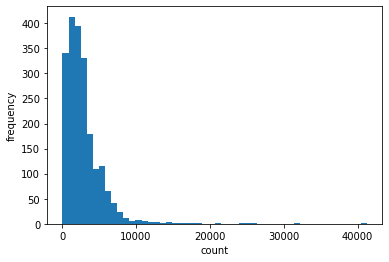

In [8]:
# histogram (a)
q1.histogram_a(df)

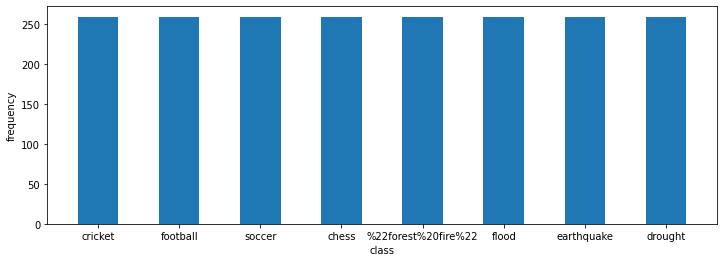

In [9]:
# histogram (b)
q1.histogram_bc(df,'leaf_label')

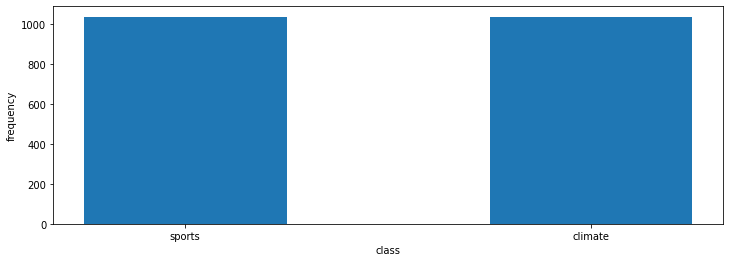

In [10]:
# histogram (c)
q1.histogram_bc(df,'root_label')

## Question2

In [11]:
import numpy as np
import random 

np.random.seed(42)
random.seed(42)

In [12]:
from sklearn.model_selection import train_test_split

def question2(train,test):
    
    train_num = train.shape[0]
    test_num = test.shape[0]
    return train_num,test_num

train, test = train_test_split(df[["full_text","root_label"]], test_size=0.2)

train_num,test_num = question2(train,test)
print("train number:{}".format(train_num))
print("test number:{}".format(test_num))

train number:1657
test number:415


## Question3

In [13]:
from sklearn.feature_extraction import text
import re
def clean(text):
    text = re.sub(r'^https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
    texter = re.sub(r"<br />", " ", text)
    texter = re.sub(r"&quot;", "\"",texter)
    texter = re.sub('&#39;', "\"", texter)
    texter = re.sub('\n', " ", texter)
    texter = re.sub(' u '," you ", texter)
    texter = re.sub('`',"", texter)
    texter = re.sub(' +', ' ', texter)
    texter = re.sub(r"(!)\1+", r"!", texter)
    texter = re.sub(r"(\?)\1+", r"?", texter)
    texter = re.sub('&amp;', 'and', texter)
    texter = re.sub('\r', ' ',texter)
    clean = re.compile('<.*?>')
    texter = texter.encode('ascii', 'ignore').decode('ascii')
    texter = re.sub(clean, '', texter)
    if texter == "":
        texter = ""
    return texter

def clean_data(data):
    for index,row in data.iterrows():
        row['full_text'] = clean(row['full_text'])
    return data

In [14]:
# clean the data 
train_clean = clean_data(train)
test_clean = clean_data(test)

In [15]:
# import necessary libraries
import nltk

## Uncomment all and download and comment it back 
# nltk.download('punkt')#, if you need "tokenizers/punkt/english.pickle", choose it
# nltk.download('averaged_perceptron_tagger')
# nltk.download('stopwords' )
# nltk.download('wordnet')
# nltk.download('omw-1.4')

In [16]:
# import necessary libraries
from nltk import pos_tag
from sklearn.feature_extraction import text
from nltk.corpus import stopwords
from string import punctuation
from sklearn.feature_extraction.text import CountVectorizer

In [17]:
# Lemmatization

stop_words_en = stopwords.words('english')
stop_words_skt = text.ENGLISH_STOP_WORDS
print("# of stop_words_en:\t\t %s" % len(stop_words_en))
print("# of stop_words_skt:\t\t %s" % len(stop_words_skt))
print("# of punctuation:\t\t %s" % len(punctuation))
combined_stopwords = set.union(set(stop_words_en),set(punctuation),set(stop_words_skt))
wnl = nltk.wordnet.WordNetLemmatizer()
analyzer = CountVectorizer().build_analyzer()

def penn2morphy(penntag):
    """ Converts Penn Treebank tags to WordNet. """
    morphy_tag = {'NN':'n', 'JJ':'a',
                  'VB':'v', 'RB':'r'}
    try:
        return morphy_tag[penntag[:2]]
    except:
        return 'n' 

def lemmatize_sent(list_word): 
    # Text input is string, returns array of lowercased strings(words).
    return [wnl.lemmatize(word.lower(), pos=penn2morphy(tag)) 
            for word, tag in pos_tag(list_word)]

def stem_rmv_punc(doc): # this should have been at the sentence-level because the pos-tag performs best at sentence-level
    return (word for word in lemmatize_sent(analyzer(doc)) if word not in combined_stopwords and not word.isdigit())

count_vect = CountVectorizer(stop_words='english', min_df=3, max_df=0.7, analyzer=stem_rmv_punc)

# of stop_words_en:		 179
# of stop_words_skt:		 318
# of punctuation:		 32


In [18]:
X_train_counts = count_vect.fit_transform(train.full_text)
print(X_train_counts.shape)

X_test_counts = count_vect.transform(test.full_text)
print(X_test_counts.shape)

(1657, 10130)
(415, 10130)


In [19]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer()

X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
print(X_train_tfidf.shape)

X_test_tfidf = tfidf_transformer.transform(X_test_counts)
print(X_test_tfidf.shape)

(1657, 10130)
(415, 10130)


#### Pros and Cons

the advantages of stemming are that it’s straightforward to implement and fast to run.

lemmatization provides better results by performing an analysis that depends on the word’s part-of-speech and producing real, dictionary words. 

However, if we are heavily optimizing for speed, a simpler stemming algorithm can be a possibility.

## Question 4

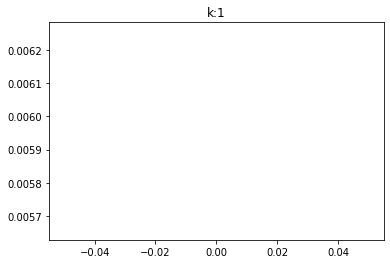

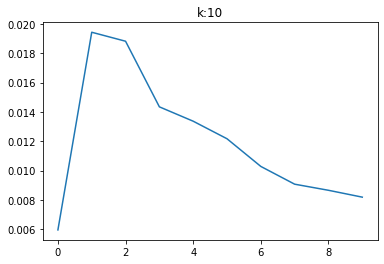

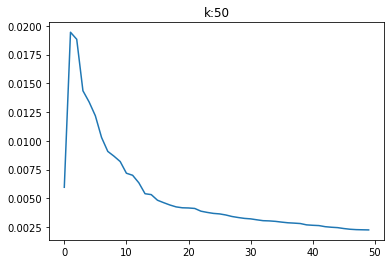

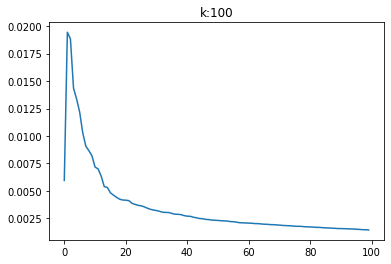

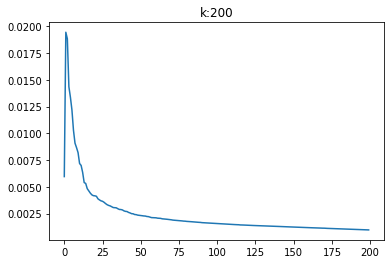

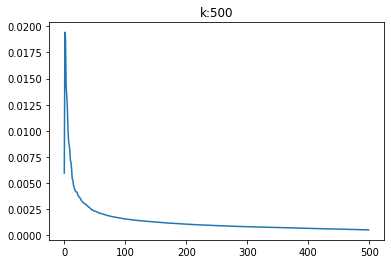

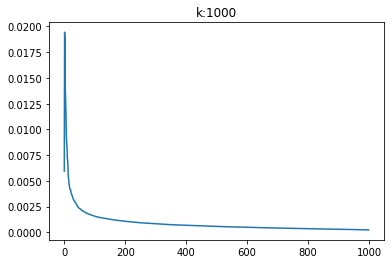

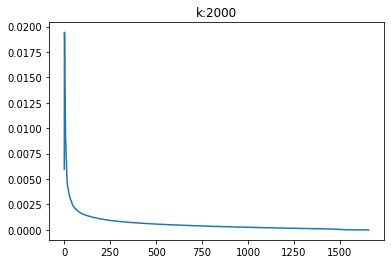

In [20]:
from sklearn.decomposition import TruncatedSVD
# The explained variance ratio plot
k = [1, 10, 50, 100, 200, 500, 1000, 2000]
for i in range(len(k)):
    SVD = TruncatedSVD(n_components=k[i], random_state=0)
    SVD.fit_transform(X_train_tfidf)
    fig = plt.plot(SVD.explained_variance_ratio_)
    plt.title("k:{}".format(k[i]))
    plt.show()

The explained variance ration:

This is an array of the variance of the data explained by each of the {k} principal components. This plot tells us that the biggest data variance lands on between 5-10 PC, which is where the peak is. 


In [21]:
## For LSI

SVD_50 = TruncatedSVD(n_components=50, random_state=0)
X_train_lsi = SVD_50.fit_transform(X_train_tfidf)
X_test_lsi = SVD_50.transform(X_test_tfidf)
print(X_train_tfidf.shape)
print(X_train_lsi.shape)
# print(SVD_50.explained_variance_ratio_)
# print(SVD_50.explained_variance_ratio_.cumsum())
print(X_test_tfidf.shape)
print(X_test_lsi.shape)

(1657, 10130)
(1657, 50)
(415, 10130)
(415, 50)


In [22]:
## For NMF
from sklearn.decomposition import NMF

NMF_50 = NMF(n_components=50, init='random', random_state=0)
X_train_nmf = NMF_50.fit_transform(X_train_tfidf)
print(X_train_tfidf.shape)
print(X_train_nmf.shape)

X_test_nmf = NMF_50.transform(X_test_tfidf)
print(X_test_tfidf.shape)
print(X_test_nmf.shape)

(1657, 10130)
(1657, 50)
(415, 10130)
(415, 50)


In [23]:
import numpy as np
## Loss of LSI
Sigma_V = SVD_50.components_
error_lsi = np.sum(np.array(X_train_tfidf - X_train_lsi.dot(Sigma_V)) ** 2)
print(error_lsi)

1179.9461432115684


In [24]:
## Loss of NMF
H = NMF_50.components_
error_nmf = np.sum(np.array(X_train_tfidf - X_train_nmf.dot(H)) ** 2)
print(error_nmf)

1200.5605264906985


In [25]:
if error_lsi > error_nmf:
    print("The loss of LSI is larger!")
else: 
    print("The loss of NMF is larger!")

The loss of NMF is larger!


Why?

Both NMF and SVD represent a set of vectors in a given basis. The basis in NMF is composed of vectors with positive elements while the basis in SVD can have positive or negative values.

The difference then is that NMF reconstructs each vector as a positive summation of the basis vectors, in other words you take a little of each vector in the basis to reconstruct your data.

In SVD the data is modeled as a linear combination of the basis you can add or substract vectors as needed.

## Question 5

In [26]:
# root_label -> vector
# sport -> 0
# climate -> 1

def new_label(data):
    new_label = []
    data_class = list(set(data['root_label'])) #    ['sports', 'climate']
    
    for i,row in data.iterrows():
        if row['root_label'] == data_class[0]:
            new_label.append(0)
        elif row['root_label'] == data_class[1]:
            new_label.append(1)
        else:
            print('wrong label')
    return new_label

train_label = new_label(train)
test_label = new_label(test)
# check 
print("train label number:{}".format(len(train_label)))
print("test label number:{}".format(len(test_label)))

train label number:1657
test label number:415


In [27]:
# check label
print(train['root_label'].head())
print(train_label[0:5])
print(test['root_label'].head())
print(test_label[0:5])

1431    climate
1567    climate
1044    climate
175      sports
1610    climate
Name: root_label, dtype: object
[1, 1, 1, 0, 1]
1351    climate
733      sports
678      sports
1460    climate
411      sports
Name: root_label, dtype: object
[1, 0, 0, 1, 0]


### Train SVM model

In [28]:
# train linear SVM

from sklearn.svm import SVC

svm_hard = SVC(kernel='linear', C=1000, random_state=42)
svm_soft = SVC(kernel='linear', C=0.0001, random_state=42)

svm_hard.fit(X_train_lsi, train_label)
svm_soft.fit(X_train_lsi, train_label)

SVC(C=0.0001, kernel='linear', random_state=42)

#### Receiver Operating Characteristic (ROC)

Example of Receiver Operating Characteristic (ROC) metric to evaluate classifier output quality.

ROC curves typically feature true positive rate on the Y axis, and false positive rate on the X axis. This means that the top left corner of the plot is the “ideal” point - a false positive rate of zero, and a true positive rate of one. This is not very realistic, but it does mean that a larger area under the curve (AUC) is usually better.

The “steepness” of ROC curves is also important, since it is ideal to maximize the true positive rate while minimizing the false positive rate.

ROC curves are typically used in binary classification to study the output of a classifier. In order to extend ROC curve and ROC area to multi-label classification, it is necessary to binarize the output. One ROC curve can be drawn per label, but one can also draw a ROC curve by considering each element of the label indicator matrix as a binary prediction (micro-averaging).

In [29]:
# plot ROC
from sklearn import metrics

def plot_ROC(fpr,tpr):
    fig = plt.figure()
    roc_auc = metrics.auc(fpr,tpr)
    plt.plot(fpr,tpr,label="area under curve = %0.3f" %roc_auc)
    plt.xlabel('False positive rate',fontsize=10)
    plt.ylabel('True positive rate',fontsize=10)
    plt.grid()
    plt.legend()
    return roc_auc
    

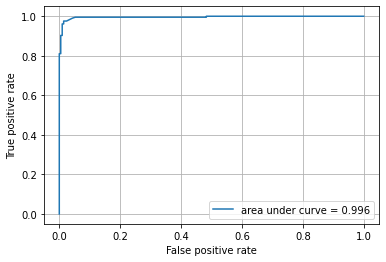

In [30]:
# plot ROC curve for svm_hard
score_hard = svm_hard.decision_function(X_test_lsi)
fpr_hard,tpr_hard,_ = metrics.roc_curve(test_label,score_hard)
auc_hard = plot_ROC(fpr_hard,tpr_hard)

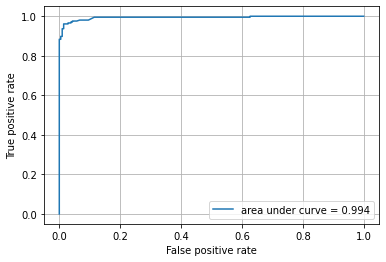

In [31]:
# plot ROC curve for svm_hard
score_soft = svm_soft.decision_function(X_test_lsi)
fpr_soft,tpr_soft,_ = metrics.roc_curve(test_label,score_soft)
auc_soft = plot_ROC(fpr_soft,tpr_soft)

In [32]:
# comparison
if auc_hard > auc_soft:
    print('SVM_hard is better')
else:
    print('SVM_soft is better')

SVM_hard is better


In [33]:
# Evaluation

def evaluation(classifier,test_data,test_label):
    test_pre = classifier.predict(test_data)
    confusion_m = metrics.confusion_matrix(test_label,test_pre)
    print("Confusion matrix:")
    print('_' * 20)
    print(confusion_m)
    print('_' * 20)
    print(metrics.classification_report(test_label,test_pre))
    

In [34]:
print("Performance of SVM hard")
print('_' * 40)
evaluation(svm_hard,X_test_lsi,test_label)
print('_' * 60)
print("Performance of SVM soft")
print('_' * 40)
evaluation(svm_soft,X_test_lsi,test_label)

Performance of SVM hard
________________________________________
Confusion matrix:
____________________
[[206   3]
 [  8 198]]
____________________
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       209
           1       0.99      0.96      0.97       206

    accuracy                           0.97       415
   macro avg       0.97      0.97      0.97       415
weighted avg       0.97      0.97      0.97       415

____________________________________________________________
Performance of SVM soft
________________________________________
Confusion matrix:
____________________
[[  0 209]
 [  0 206]]
____________________
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       209
           1       0.50      1.00      0.66       206

    accuracy                           0.50       415
   macro avg       0.25      0.50      0.33       415
weighted avg       0.25      0.50      0.33 

/home/shivam/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/shivam/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/shivam/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Use cross-validation to choose $\gamma$

In [35]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit

def cross_validate(classifier, train, label):
    avg_score = []

    for k in range(-3, 6):
        classifier.set_params(C=10**k).fit(train, label)
        cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=42)
        scores = cross_val_score(classifier, train, label, cv=cv, scoring='accuracy')
    
        print('-'*20,'C =',10**k,'-'*20)
        print(scores)
        print(np.average(scores))
        avg_score.append(np.average(scores))

    max_score = np.max(avg_score)
    index = avg_score.index(max_score)
    c_idx = [x for x in range(-3,4)][index]
    print('-'*20,'Result','-'*20)
    print('The best classifier is when C =', 10**c_idx)
    print('Average Accuracy is:', max_score)
    
    return classifier.set_params(C=10**c_idx).fit(train,label)

svm_score = cross_validate(SVC(kernel='linear'), X_train_lsi, train_label)


-------------------- C = 0.001 --------------------
[0.49196787 0.46787149 0.49799197 0.47590361 0.48795181]
0.4843373493975903
-------------------- C = 0.01 --------------------
[0.49196787 0.46787149 0.49799197 0.47590361 0.48795181]
0.4843373493975903
-------------------- C = 0.1 --------------------
[0.95381526 0.94779116 0.94578313 0.91767068 0.92168675]
0.9373493975903614
-------------------- C = 1 --------------------
[0.95783133 0.9437751  0.95381526 0.93373494 0.9437751 ]
0.9465863453815262
-------------------- C = 10 --------------------
[0.96184739 0.95381526 0.95983936 0.94779116 0.95783133]
0.9562248995983935
-------------------- C = 100 --------------------
[0.96787149 0.95180723 0.96787149 0.95381526 0.95983936]
0.9602409638554217
-------------------- C = 1000 --------------------
[0.96385542 0.9497992  0.96586345 0.9497992  0.95582329]
0.9570281124497994
-------------------- C = 10000 --------------------
[0.96184739 0.9437751  0.95381526 0.95180723 0.96987952]
0.956224

##### The best $\gamma$ for SVM is c = 100 

In [36]:
# plot ROC curve for svm_best
score_best = svm_best.decision_function(X_test_lsi)
fpr_best,tpr_best,_ = metrics.roc_curve(test_label,score_best)
auc_best = plot_ROC(fpr_soft,tpr_soft)
print("auc_best:%0.4f" % auc_best)

NameError: name 'svm_best' is not defined

In [ ]:
## evaluate this svm_best model
print("Performance of SVM soft")
print('_' * 40)
evaluation(svm_best,X_test_lsi,test_label)

## Question 6

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

logistic = LogisticRegression(penalty = 'none', max_iter=10000, tol=0.1)
Xtrain_logistic = X_train_lsi
ytrain_logistic = train.root_label=="sports"
logistic.fit(Xtrain_logistic, ytrain_logistic)

Xtest_logistic = X_test_lsi
ytest_logistic = test.root_label=="sports"
ytest_pred_logistic = logistic.predict(Xtest_logistic)
print(logistic.score(Xtest_logistic, ytest_logistic))
print(classification_report(ytest_logistic, ytest_pred_logistic))

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

def plot_roc(fpr, tpr):
    fig, ax = plt.subplots()

    roc_auc = auc(fpr,tpr)

    ax.plot(fpr, tpr, lw=2, label= 'area under curve = %0.4f' % roc_auc)

    ax.grid(color='0.7', linestyle='--', linewidth=1)

    ax.set_xlim([-0.1, 1.1])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate',fontsize=15)
    ax.set_ylabel('True Positive Rate',fontsize=15)

    ax.legend(loc="lower right")

    for label in ax.get_xticklabels()+ax.get_yticklabels():
        label.set_fontsize(15)

def fit_predict_and_plot_roc(pipe, train_data, train_label, test_data, test_label):
    pipe.fit(train_data, train_label)
    # pipeline1.predict(twenty_test.data)

    prob_score = pipe.predict_proba(test_data)

    fpr, tpr, _ = roc_curve(test_label, prob_score[:,1])

    plot_roc(fpr, tpr)
    return pipe

In [ ]:
fit_predict_and_plot_roc(logistic, Xtrain_logistic, ytrain_logistic, Xtest_logistic, ytest_logistic)

In [ ]:
# Regularization Comparision: none vs l1 vs l2

logisticNone = LogisticRegression(penalty = 'none', max_iter=10000, tol=0.1)
logisticL1 = LogisticRegression(penalty = 'l1', solver='liblinear', max_iter=10000, tol=0.1)
logisticL2 = LogisticRegression( penalty = 'l2', max_iter=10000, tol=0.1)

logisticNone.fit(Xtrain_logistic, ytrain_logistic)
logisticL1.fit(Xtrain_logistic, ytrain_logistic)
logisticL2.fit(Xtrain_logistic, ytrain_logistic)

ytest_pred_logistic_None = logisticNone.predict(Xtest_logistic)
print(logisticNone.score(Xtest_logistic, ytest_logistic))
print(classification_report(ytest_logistic, ytest_pred_logistic))

ytest_pred_logistic_L1 = logisticL1.predict(Xtest_logistic)
print(logisticL1.score(Xtest_logistic, ytest_logistic))
print(classification_report(ytest_logistic, ytest_pred_logistic))

ytest_pred_logistic_L2 = logisticL2.predict(Xtest_logistic)
print(logisticL2.score(Xtest_logistic, ytest_logistic))
print(classification_report(ytest_logistic, ytest_pred_logistic))

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, make_scorer
from sklearn.model_selection import cross_val_score

def classification_report_with_accuracy_score(y_true, y_pred):

    print (classification_report(y_true, y_pred))# print classification report
    return accuracy_score(y_true, y_pred) # return accuracy score

# 5-Fold Cross Validation with L1

cv_score_L1 = cross_val_score(logisticL1, X=Xtrain_logistic, y=ytrain_logistic, cv=5, \
               scoring=make_scorer(classification_report_with_accuracy_score))
print (cv_score_L1)

In [ ]:
# 5-Fold Cross Validation with L2

cv_score_L2 = cross_val_score(logisticL2, X=Xtrain_logistic, y=ytrain_logistic, cv=5, \
               scoring=make_scorer(classification_report_with_accuracy_score))
print (cv_score_L2)

## Question 7

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

naivebayes = GaussianNB()
Xtrain = X_train_lsi
ytrain = train.root_label=="sports"
naivebayes.fit(Xtrain, ytrain)

Xtest = X_test_lsi
ytest = test.root_label=="sports"
ytest_pred_gNB = naivebayes.predict(Xtest)
print(naivebayes.score(Xtest, ytest))
print(classification_report(ytest, ytest_pred_gNB))

## Question 8: Comparison between three classifiers

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

class EstimatorSelectionHelper:

    def __init__(self, models, params):
        if not set(models.keys()).issubset(set(params.keys())):
            missing_params = list(set(models.keys()) - set(params.keys()))
            raise ValueError("Some estimators are missing parameters: %s" % missing_params)
        self.models = models
        self.params = params
        self.keys = models.keys()
        self.grid_searches = {}

    def fit(self, X, y, cv=5, n_jobs=-1, verbose=1, scoring=None, refit=False):
        count_vectorizer = CountVectorizer(min_df=3, stop_words='english', analyzer=stem_rmv_punc)
        tfidf = TfidfTransformer()
        scaler = StandardScaler(with_mean=False) # not absolutely required but does help
        pca = TruncatedSVD()
        for key in self.keys:
            print("Running GridSearchCV for %s." % key)
            model = self.models[key]
            params = self.params[key]
            pipe = Pipeline(steps=[ 
#                         ("vect", count_vectorizer),
#                         ('tfidf', tfidf), 
#                         ("scaler", scaler), 
#                         ("reduce_dim", "passthrough"),
                        ("classify", model)])
            gs = GridSearchCV(pipe, params, cv=cv, n_jobs=n_jobs,
                              verbose=verbose, scoring=scoring, refit=refit,
                              return_train_score=True)
            gs.fit(X,y)
            self.grid_searches[key] = gs    

    def score_summary(self, sort_by='mean_score'):
        def row(key, scores, params):
            d = {
                 'estimator': key,
                 'min_score': min(scores),
                 'max_score': max(scores),
                 'mean_score': np.mean(scores),
                 'std_score': np.std(scores),
            }
            return pd.Series({**params,**d})

        rows = []
        for k in self.grid_searches:
            print(k)
            params = self.grid_searches[k].cv_results_['params']
            scores = []
            for i in range(self.grid_searches[k].cv):
                key = "split{}_test_score".format(i)
                r = self.grid_searches[k].cv_results_[key]        
                scores.append(r.reshape(len(params),1))

            all_scores = np.hstack(scores)
            for p, s in zip(params,all_scores):
                rows.append((row(k, s, p)))

        df = pd.concat(rows, axis=1).T.sort_values([sort_by], ascending=False)

        columns = ['estimator', 'min_score', 'mean_score', 'max_score', 'std_score']
        columns = columns + [c for c in df.columns if c not in columns]

        return df[columns]

In [ ]:
# logistic = LogisticRegression(max_iter=10000, tol=0.1)
# count_vectorizer = CountVectorizer(min_df=3, stop_words='english', analyzer=stem_rmv_punc)
# tfidf = TfidfTransformer()
# scaler = StandardScaler(with_mean=False) # not absolutely required but does help
# pca = TruncatedSVD()

N_FEATURES_OPTIONS = [5, 50, 500]


models1 = {
    'logisticL1': LogisticRegression(penalty = 'l1', solver='liblinear', max_iter=10000),
    'logisticL2': LogisticRegression( penalty = 'l2', max_iter=10000),
    'gaussionNB': GaussianNB()
}

params1 = {
    'logisticL1': { 
#                     "vect__min_df":[3, 5],
#                     "reduce_dim": [TruncatedSVD(), NMF()],
#                     "reduce_dim__n_components": N_FEATURES_OPTIONS,
                  },
    'logisticL2': { 
#                     "vect__min_df":[3, 5],
#                     "reduce_dim": [TruncatedSVD(), NMF()],
#                     "reduce_dim__n_components": N_FEATURES_OPTIONS,
                  },
    'gaussionNB': { 
#                     "vect__min_df":[3, 5],
#                     "reduce_dim": [TruncatedSVD(), NMF()],
#                     "reduce_dim__n_components": N_FEATURES_OPTIONS,
                  },
}

helper1 = EstimatorSelectionHelper(models1, params1)
helper1.fit(Xtrain, ytrain, scoring='f1')